## Assignment 1 - Aleksi Sundell 541268

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

## GGL

In [2]:
def ggl(seed, m=2**31-1, a=16807):
  ggl_seed = (a*seed) % m
  return ggl_seed

We use GGL to generate 1.5 million random numbers:

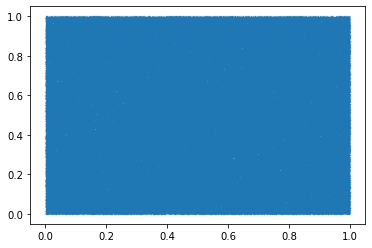

In [3]:
x = 123421
m = float(2**31-1)
A1 = []
for i in range(1500000):
    x = ggl(x)  
    A1.append(x)
    
A1 = np.array(A1)
A1 = A1 / m
X_list1 = A1[::2]
Y_list1 = A1[1::2]
plt.scatter(X_list1, Y_list1, s=0.01) 
plt.show()

From plot above we notice that GGL seems to work properly because data points are distributed uniformly. Also below we notice that mean and variance of x points is very close to the uniform distribution (for uniform distribution mean = 0.5 and var = 1/12).

In [4]:
print(np.mean(X_list1))
print(np.var(X_list1))

0.5003446022060566
0.0833348733916437


Plot of small slice on interval [0,0.0010].

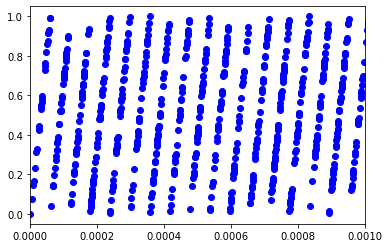

In [5]:
axes = plt.gca()
axes.set_xlim([0, 0.001])
plt.plot(X_list1, Y_list1, 'bo') 
plt.show()

## RAN3

We Initiaqlize 55 random numbers for RAN3 using GGL below.

In [6]:
def initialize(seed):   
    init_numbers = []
    for i in range(55):
        seed = ggl(seed)
        init_numbers.append(seed)
        
    return init_numbers 

In [7]:
init_numbers = initialize(3523)

RAN3 implementation and generation of random numbers. Plotting of random points in x,y -coordinates. 

In [8]:
def ran3(i ,init_numbers=init_numbers, m=2**55-1):
    if i < 55:
        return init_numbers[i]
    else:
        seed = (init_numbers[i-55] - init_numbers[i-24]) % m
        init_numbers.append(seed)
        return seed
        

<function matplotlib.pyplot.show(*args, **kw)>

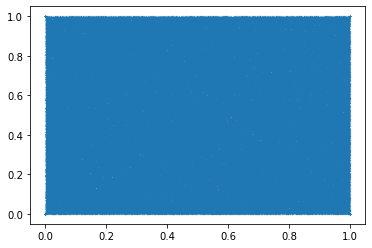

In [9]:
init_numbers_x = initialize(3243)
init_numbers_y = initialize(7457)
A2 = []
m = 2**55-1
for i in range(1500000):
    x = ran3(i, init_numbers=init_numbers_x)   
    A2.append(x)

A2 = np.array(A2)
A2 = A2 / m    
X_list2 = A2[::2]
Y_list2 = A2[1::2]    
plt.scatter(X_list2, Y_list2, s=0.01)    
plt.show

Ran3 seems to work properly.

Mean and variance of x-values:

In [10]:
print(np.mean(X_list2))
print(np.var(X_list2))

0.4998178525704407
0.08354796917625328


Plot of small slice on interval [0,0.0010].

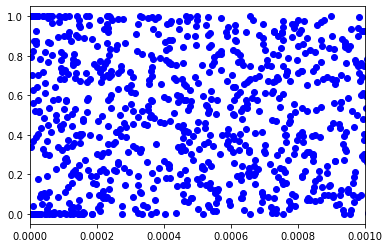

In [11]:
axes = plt.gca()
axes.set_xlim([0, 0.001])
plt.plot(X_list2, Y_list2, 'bo') 
plt.show()

## Mersenne-Twister

<function matplotlib.pyplot.show(*args, **kw)>

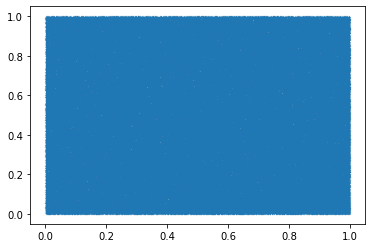

In [12]:
A3 = []
for i in range(1500000):
    x = random.random()
    A3.append(x)
    
A3 = np.array(A3)
X_list3 = A3[::2]
Y_list3 = A3[1::2]    
plt.scatter(X_list3, Y_list3, s=0.01)
plt.show

Mean and variance:

In [13]:
print(np.mean(X_list3))
print(np.var(X_list3))

0.5002291812237643
0.08344469827119354


And again a small slice of the plot below.

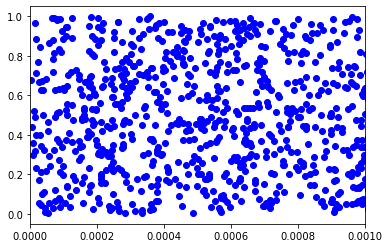

In [14]:
axes = plt.gca()
axes.set_xlim([0, 0.001])
plt.plot(X_list3, Y_list3, 'bo') 
plt.show()

## Comparison

For every RNG it seems that x,y -points are uniformly distributed according to plots and mean and variance. When comparing the slice plots we notice that points order in planes so GGL suffers from correlations. RAN3 doesnt seem to suffer similar correlations than GGL but its known that points in RAN3 suffers from triple correlations. In Python built-in RNG (Mersenne-Twister) any correlations can not be spotted.